# Generate synthetic crab data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.stats import poisson, binom

## Global user settings

In [2]:
N_MONTHS = 36
LAT1 = 37.02606
LAT2 = 37.1

LONG1 = -8.01873
LONG2 = -8.62

In [3]:
data_raw_path = os.path.join(os.getcwd(), '../data-raw')
os.listdir(data_raw_path)

['quadrats.xlsx',
 'rf_s_q1.csv',
 'rf_s_q2.csv',
 'rf_w_q1.csv',
 'rf_w_q2.csv',
 'Ria de Alvor.xlsx']

In [4]:
d1 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q1.csv'))
d2 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q2.csv'))

d3 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q1.csv'))
d4 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q2.csv'))

In [5]:
d1.head()

,cl,lcl,fw,species,longitude,is_gravid,rcl,stage,sex,id,cw,latitude
0,21,16,15,A. farensis,-8.01873,False,10,juvenile,?,1,27,37.02606
1,21,13,16,A. farensis,NaN,False,15,juvenile,?,2,27,NaN
2,15,9,10,A. farensis,NaN,True,5,juvenile,female,3,19,NaN
3,21,16,19,A. farensis,NaN,False,14,juvenile,male or female,4,26,NaN
4,19,8,14,A. farensis,NaN,False,7,juvenile,female,5,24,NaN


In [6]:
list(d1.stage.unique()), list(d2.stage.unique()), list(d1.is_gravid.unique()), list(d4.stage.unique())

(['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 [False, True],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'])

## Dates

In [7]:
start_year = 2020
months = pd.date_range(start=f'{start_year}-01-01', periods=N_MONTHS, freq='MS')  # Start of each month

# Generate random day for each month
random_dates = [
    pd.Timestamp(year=dt.year, month=dt.month, day=np.random.randint(1, dt.days_in_month + 1))
    for dt in months
]

# Convert to pandas Series or DataFrame
random_dates = pd.Series(random_dates, name="random_monthly_date")
# print(random_dates)

# basis for the number of observations

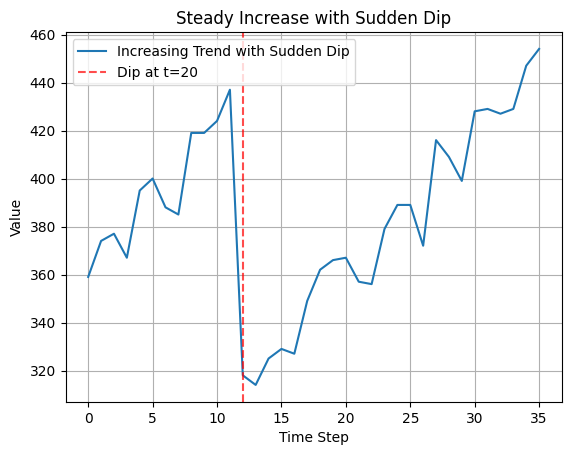

In [8]:
# Parameters
n_points = N_MONTHS
slope = 0.2
dip_time = 12
dip_magnitude = -120  # Negative for a dip
noise_std = 10.2

# Time vector
t = np.arange(n_points)

# Linear increasing trend
trend = slope * t + 12

# Sudden dip
dip = np.zeros(n_points)
dip[dip_time:] = dip_magnitude

# Add some Gaussian noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs1 = 30 * trend + noise + dip
n_crabs1 = n_crabs1.astype(int)

# Plot
plt.plot(t, n_crabs1, label='Increasing Trend with Sudden Dip')
plt.axvline(dip_time, color='red', linestyle='--', alpha=0.7, label='Dip at t=20')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Steady Increase with Sudden Dip')
plt.show()

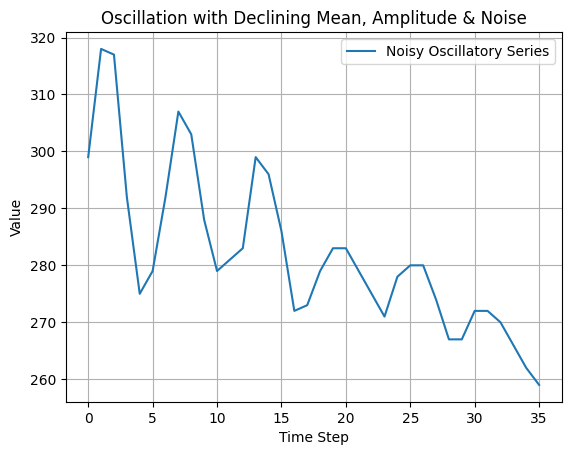

In [31]:
# Parameters
n_points = N_MONTHS
period = 6
initial_amplitude = 25
initial_mean = 300
decline_rate = 1.0
amplitude_decay_rate = 0.06
noise_std = 2.0

# Time vector
t = np.arange(n_points)

# Declining mean
mean_trend = initial_mean - decline_rate * t

# Changing amplitude over time
amplitude = initial_amplitude * np.exp(-amplitude_decay_rate * t)

# Oscillatory component with variable amplitude
oscillation = amplitude * np.sin(2 * np.pi * t / period)

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs2 = mean_trend + oscillation + noise
n_crabs2 = n_crabs2.astype(int)

# Plot
plt.plot(t, n_crabs2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Oscillation with Declining Mean, Amplitude & Noise')
plt.show()

## Temp

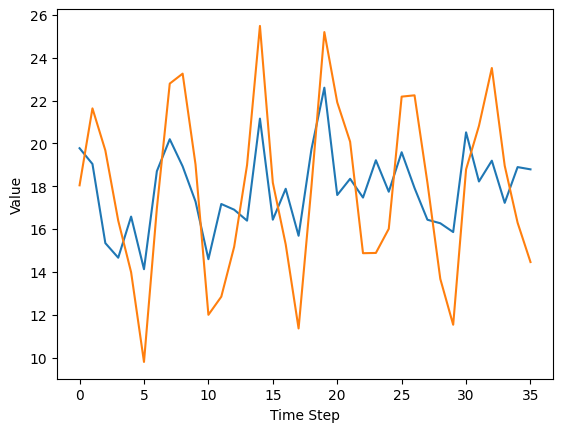

In [32]:
# Parameters
n_points = N_MONTHS
period = 6
amplitude1 = 2
amplitude2 = 5
initial_mean = 18
noise_std = 1.5

# Time vector
t = np.arange(n_points)

# Oscillatory component with variable amplitude
oscillation2 = amplitude2 * np.sin(2 * np.pi * t / period)
oscillation1 = amplitude1 * np.sin(2 * np.pi * t / period + np.pi / 3)  # Phase shift

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
t1 = initial_mean + oscillation1 + noise
t2 = initial_mean + oscillation2 + noise

# Plot
plt.plot(t, t1, label='Noisy Oscillatory Series')
plt.plot(t, t2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [33]:
cluster1_movement = [
    "Scuttling swiftly over rocky terrain.",
    "Slowly navigating around seagrass beds.",
    "Side-stepping along sandy coastal floor.",
    "Darting away in response to sudden shadow.",
    "Swimming briefly to avoid disturbance.",
    "Creeping under the cover of seagrass.",
    "Traversing algae-slick rock surfaces.",
    "Clambering up submerged tree trunks.",
    "Scaling steep rock faces near shore.",
    "Swiftly dashing across exposed sand.",
    "Advancing toward bait in water.",
    "Progressing cautiously through new area.",
    "Group migration across shallow seabed.",
    "Frequent pausing while exploring.",
    "Gradual movement in cold conditions."
]

cluster2_feeding = [
    "Grazing on mollusks among debris.",
    "Picking algae carefully off rock faces.",
    "Filtering detritus from shallow bottom.",
    "Harvesting food beneath floating debris.",
    "Foraging through tangled seagrass roots.",
    "Scavenging at the edge of tidal pools.",
    "Consuming algae scraped from barnacles.",
    "Feeding on small crustaceans in crevices.",
    "Sifting through sediment for scraps.",
    "Collecting biofilm from sunken wood.",
    "Rapid clawing during feeding bouts.",
    "Nibbling detritus off seabed patches.",
    "Searching tidal pools for nutrients.",
    "Feeding on decaying matter among rocks."
]

cluster3_social = [
    "Waving claw in signal to another crab.",
    "Engaging in antennae-to-antennae contact.",
    "Claw snapping in aggressive encounter.",
    "Displaying territorial behavior against intruder.",
    "Performing dominance display by body lifting.",
    "Claw shaking post-contact gesture.",
    "Vibrating antennae in flowing current.",
    "Interaction with nearby hermit crab.",
    "Claw snapping in diver confrontation.",
    "Rhythmic waving as social cue.",
    "Brief social contact with fellow crabs.",
    "Mating ritual involving antennae brushing.",
    "Guarding eggs beneath body flap.",
    "Approaching small fish with curiosity."
]

cluster4_shelter = [
    "Retreating quickly into hidden burrow.",
    "Burrowing into soft, sandy sediment.",
    "Sheltering under broken shell piece.",
    "Camouflaging with nearby mud.",
    "Hiding beneath overhanging rock.",
    "Resting in shaded crevice along cliff.",
    "Staying half-submerged in loose sand.",
    "Taking cover beneath seagrass leaves.",
    "Concealing self beneath floating matter.",
    "Stationary, blending into rocky backdrop.",
    "Entering burrow after disturbance.",
    "Lying still to avoid detection.",
    "Peering out cautiously from cover."
]

cluster5_defensive = [
    "Adopting threatening stance when approached.",
    "Escaping from pursuing predator silhouette.",
    "Engaging in struggle with seaweed entanglement.",
    "Inspecting remains of another crab.",
    "Color change during molting stress.",
    "Retreating swiftly from perceived danger.",
    "Guarding hole in substrate from intruders.",
    "Resisting aggressive fish encounter.",
    "Defensive claw movement in water.",
    "Reacting to sudden changes in temperature.",
    "Emerging slowly after perceived threat.",
    "Protecting territory in confined space."
]

texts = cluster1_movement + cluster2_feeding + cluster3_social + cluster4_shelter + cluster5_defensive

associated_species = [
    "Sea Star",
    "Hermit Crab",
    "Small Fish",
    "Snail",
    "Shrimp",
    "Barnacle",
    "Sea Anemone",
    "Sea Urchin",
    "Algae",
    "Polychaete Worm",
    "Mussel",
    "Coral Fragment",
    "Jellyfish",
    "Sea Sponge",
    "Crab (Other Species)",
]

## I need to generate crab by crab, not column by column

In [18]:
def random_associated_species(species_list, min_items=1, max_items=5):
    n = random.randint(min_items, max_items)
    return random.sample(species_list, n)

def generate_noisy_poisson(mu, cutoff=5, mult=6):
    """    Generate a noisy sample from a Poisson distribution, apply a linear transformation,
    and filter out values below a specified cutoff.
    """
    samples = poisson.rvs(mu=mu, size=1000)
    noise = np.random.normal(loc=0, scale=1.0, size=samples.shape)
    noisy_samples = mult*(samples + noise)
    # cut values less than X
    noisy_samples = noisy_samples[noisy_samples >= cutoff].astype(int)
    return noisy_samples


def generate_noisy_normal(mu, sigma=1.0):
    """
    Generate a sample from a normal distribution, apply a linear transformation,
    and filter out values below a specified cutoff.

    Parameters:
        mu (float): Mean of the normal distribution.
        sigma (float): Standard deviation of the normal distribution.
        cutoff (float): Minimum value threshold after transformation.

    Returns:
        np.ndarray: Filtered and scaled samples as integers.
    """
    samples = np.random.normal(loc=mu, scale=sigma, size=1000)
    # samples = samples[samples <= cutoff].astype(int)
    return samples.astype(int)

In [19]:
species = ['A farensis', 'A. Farensis', 'U. olhanensis', 'u. olhanen.', 'Ucides alvorensis']
lst_sex = ['female', 'male', 'male or female', ' ', '-', np.nan, 'N/R']
lst_stage = ['juvenile', 'pre_puberty', 'sub_adult', 'adult']
lst_stage2 = ['j', 'p', 's', 'a']

### R Formosa

In [23]:
# different probabilities for each species
psex_far=[0.45, 0.47, 0.02, 0.01, 0.02, 0.01, 0.02]
psex_olh=[0.48, 0.47, 0.01, 0.01, 0.01, 0.01, 0.01]
psex_alv=[0.3, 0.3, 0.2, 0.05, 0.05, 0.05, 0.05]

In [24]:
mus_formosa = np.linspace(2, 5, N_MONTHS)
cutoffs_formosa = np.linspace(4, 7, N_MONTHS)

mus_formosa_fw = np.linspace(50, 20, N_MONTHS)
# cutoffs_formosa_fw = np.linspace(5, 10, N_MONTHS)

In [25]:
from tqdm import tqdm

In [26]:
for idx in tqdm(range(N_MONTHS)):
# for idx in range(2):

    date = random_dates[idx]  # Use the first random date for all crabs
    count = 0
    df = pd.DataFrame(columns=['species', 'sex', 'stage'])

    pstage_far=[0.15-idx*0.001, 0.2, 0.3+idx*0.001, 0.4-idx*0.002]
    total = sum(pstage_far)
    pstage_far = [x / total for x in pstage_far]  # Normalize to sum to 1

    pstage_olh=[0.15-idx*0.002, 0.2, 0.3-idx*0.001, 0.4+idx*0.002]
    total = sum(pstage_olh)
    pstage_olh = [x / total for x in pstage_olh]  # Normalize to sum to 1
    pstage_alv=[0.25-idx*0.001, 0.3, 0.25+idx*0.001, 0.25]
    total = sum(pstage_alv)
    pstage_alv = [x / total for x in pstage_alv]  # Normalize to sum to 1

    # make gravid crabs probabilistic
    p_gravid = [0.3 * (1 + 0.01 * idx), 0.7 * (1 - 0.01 * idx)]
    total = sum(p_gravid)
    p_gravid = [x / total for x in p_gravid]  # Normalize to sum to 1


    # numerical cols
    cl = generate_noisy_poisson(mus_formosa[idx], cutoff=int(cutoffs_formosa[idx]))
    fw = generate_noisy_normal(mus_formosa_fw[idx], sigma=1.0)


    # Parameters
    n_trials = 18      # number of trials per sample
    p_success = 0.45   # probability of success
    n_samples = 1000   # number of samples to generate

    # Generate samples

    dep = binom.rvs(n=n_trials, p=p_success, size=n_crabs1[idx])

    # quartiles
    dep_quartiles = np.percentile(dep, [20, 50, 65, 85])
    # map quartiles to factors in dictionary
    quartile_factors = {
        'Q1': 0.9,
        'Q2': 1.0,
        'Q3': 1.2,
        'Q4': 1.5
    }

    for i in range(n_crabs1[idx]):
        crab_dict = {
            'species': np.random.choice(species, p=[0.2, 0.16, 0.25, 0.31, 0.08]),
        }
        if crab_dict['species'][0] == 'A':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_far)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_far)

        elif crab_dict['species'][:2] == 'Uc':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_alv)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_alv)
        else:
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_olh)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_olh)

        if crab_dict['sex'] == 'female':
            crab_dict['is_gravid'] = np.random.choice([True, False], p=p_gravid)
        else:
            if i % 10 == 0:  # every 10th crab is gravid
                crab_dict['is_gravid'] = True

        crab_dict['behaviour'] = np.random.choice(texts, replace=True)
        crab_dict['associated_species'] = random_associated_species(associated_species)
        crab_dict['depth [m]'] = dep[i]

        factor = quartile_factors['Q1'] if dep[i] <= dep_quartiles[0] else \
            quartile_factors['Q2'] if dep[i] <= dep_quartiles[1] else \
            quartile_factors['Q3'] if dep[i] <= dep_quartiles[2] else \
            quartile_factors['Q4'] if dep[i] <= dep_quartiles[3] else 1.0

        # pick from quartily based on the stage
        if crab_dict['stage'] == 'juvenile':
            crab_dict['cl [mm]'] = cl[i] * 0.5  # Juveniles are smaller
            # make 'cw correlated with 'cl' for juveniles
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.6, 1.4)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'pre_puberty':
            crab_dict['cl [mm]'] = cl[i] * 0.75  # Pre-puberty crabs are medium-sized
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.7, 1.3)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'sub_adult':
            crab_dict['cl [mm]'] = cl[i] * 1.25  # Sub-adults are larger
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.8, 1.2)  # Randomly vary the correlation

        else:
            crab_dict['cl [mm]'] = cl[i] * 1.5  # Adults are the largest
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.9, 1.1)  # Randomly vary the correlation


        if crab_dict['sex'] == 'female':
            # multiply by a factor to simulate smaller size
            crab_dict['cl [mm]'] *= np.random.uniform(0.7, 0.9)
            crab_dict['cw [mm]'] *= np.random.uniform(0.8, 0.85)

        crab_dict['lcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(1.2, 1.5)
        crab_dict['rcl [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(1.0, 1.1)

        crab_dict['fw [mm]'] = fw[i]
        crab_dict['date'] = date
        crab_dict['latitude'] = None
        crab_dict['longitude'] = None

        crab_dict['id'] = count
        count += 1
        df = pd.concat([df, pd.DataFrame([crab_dict])], ignore_index=True)
    df['id'] = df['id'].astype(int)

    # introduce bad values
    for _ in range(3):
        ii = random.randint(0, len(df) - 1)
        df.iloc[ii, df.columns.get_loc('cw [mm]')] = -999
    df.loc[0, 'latitude'] = LAT1
    df.loc[0, 'longitude'] = LONG1
    df.reset_index(inplace=True, drop=True)

    filename = f'{str(date.date())}_rf.csv'
    df.to_csv(filename)#, index=False)

  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:30<00:00,  1.18it/s]


In [27]:
df

,species,sex,stage,is_gravid,behaviour,associated_species,depth [m],cl [mm],cw [mm],lcl [mm],rcl [mm],fw [mm],date,latitude,longitude,id
0,A. Farensis,female,sub_adult,False,Resisting aggressive fish encounter.,"[Algae, Hermit Crab, Small Fish, Crab (Other S...",7.0,37.095236,36.328257,51.062673,40.405120,19.0,2022-12-28,37.02606,-8.01873,0
1,Ucides alvorensis,male,sub_adult,NaN,Retreating swiftly from perceived danger.,"[Sea Star, Polychaete Worm]",8.0,37.500000,39.639097,58.854712,39.246231,19.0,2022-12-28,None,None,1
2,Ucides alvorensis,male,sub_adult,NaN,Swiftly dashing across exposed sand.,"[Sea Urchin, Shrimp, Sea Star, Snail, Barnacle]",7.0,23.750000,23.639789,29.175620,25.177120,20.0,2022-12-28,None,None,2
3,A. Farensis,male,juvenile,NaN,Staying half-submerged in loose sand.,"[Hermit Crab, Barnacle, Jellyfish, Shrimp]",7.0,9.500000,6.447908,8.980507,9.554395,19.0,2022-12-28,None,None,3
4,U. olhanensis,male,adult,NaN,"Burrowing into soft, sandy sediment.","[Mussel, Sea Anemone, Crab (Other Species)]",5.0,25.500000,26.352713,35.329449,26.473629,20.0,2022-12-28,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,A. Farensis,female,pre_puberty,True,Picking algae carefully off rock faces.,[Jellyfish],9.0,12.906538,16.677227,24.928230,13.474285,20.0,2022-12-28,None,None,449
450,A. Farensis,female,adult,False,"Stationary, blending into rocky backdrop.","[Shrimp, Hermit Crab, Sea Anemone, Crab (Other...",8.0,51.017899,51.334820,62.185496,55.743758,19.0,2022-12-28,None,None,450
451,u. olhanen.,male,adult,NaN,Swimming briefly to avoid disturbance.,[Polychaete Worm],8.0,27.000000,28.407582,42.310446,28.297137,18.0,2022-12-28,None,None,451
452,U. olhanensis,male,sub_adult,NaN,"Burrowing into soft, sandy sediment.",[Jellyfish],9.0,58.750000,55.210797,79.858702,61.060579,19.0,2022-12-28,None,None,452


## Ria Alvor

In [34]:
# different probabilities for each species
psex_far=[0.43, 0.49, 0.02, 0.01, 0.02, 0.01, 0.02]
psex_olh=[0.47, 0.48, 0.01, 0.01, 0.01, 0.01, 0.01]
psex_alv=[0.35, 0.35, 0.1, 0.05, 0.05, 0.05, 0.05]

In [35]:
mus_formosa = np.linspace(3, 6, N_MONTHS)
cutoffs_formosa = np.linspace(4, 7, N_MONTHS)

mus_formosa_fw = np.linspace(40, 20, N_MONTHS)
# cutoffs_formosa_fw = np.linspace(5, 10, N_MONTHS)

In [36]:
for idx in tqdm(range(N_MONTHS)):
# for idx in range(2):

    date = random_dates[idx]  # Use the first random date for all crabs
    # extract season from date
    season = date.month
    if season in [12, 1, 2]:
        season = 'winter'
    elif season in [3, 4, 5]:
        season = 'spring'
    elif season in [6, 7, 8]:
        season = 'summer'

    count = 0
    df = pd.DataFrame(columns=['species_name', 'sex', 'stage'])

    pstage_far=[0.17+idx*0.001, 0.18, 0.33-idx*0.001, 0.37+idx*0.002]
    total = sum(pstage_far)
    pstage_far = [x / total for x in pstage_far]  # Normalize to sum to 1

    pstage_olh=[0.17-idx*0.002, 0.18, 0.33-idx*0.001, 0.37-idx*0.002]
    total = sum(pstage_olh)
    pstage_olh = [x / total for x in pstage_olh]  # Normalize to sum to 1
    pstage_alv=[0.27+idx*0.001, 0.28, 0.28+idx*0.001, 0.22]
    total = sum(pstage_alv)
    pstage_alv = [x / total for x in pstage_alv]  # Normalize to sum to 1

    # make gravid crabs probabilistic
    p_gravid = [0.2 * (1 - 0.01 * idx), 0.8 * (1 + 0.01 * idx)]
    if season == 'winter':
        p_gravid[0] *= 0.8  # Reduce probability of gravid females in winter
        p_gravid[1] *= 1.2  # Increase probability of non-gravid females in winter
    if season == 'spring':
        p_gravid[0] *= 1.2  # Increase probability of gravid females in spring
    elif season == 'summer':
        p_gravid[0] *= 1.1  # Slightly increase probability of gravid females in summer
    elif season == 'autumn':
        p_gravid[0] *= 0.9  # Slightly decrease probability of gravid females in autumn
    total = sum(p_gravid)
    p_gravid = [x / total for x in p_gravid]  # Normalize to sum to 1


    # numerical cols
    cl = generate_noisy_poisson(mus_formosa[idx], cutoff=int(cutoffs_formosa[idx]))
    fw = generate_noisy_normal(mus_formosa_fw[idx], sigma=1.0)


    # Parameters
    n_trials = 18      # number of trials per sample
    p_success = 0.35   # probability of success
    n_samples = 1000   # number of samples to generate

    # Generate samples

    dep = binom.rvs(n=n_trials, p=p_success, size=n_crabs1[idx])

    # quartiles
    dep_quartiles = np.percentile(dep, [20, 50, 65, 85])
    # map quartiles to factors in dictionary
    quartile_factors = {
        'Q1': 0.9,
        'Q2': 1.0,
        'Q3': 1.2,
        'Q4': 1.5
    }

    for i in range(n_crabs2[idx]):
        crab_dict = {
            'species_name': np.random.choice(species, p=[0.22, 0.18, 0.23, 0.29, 0.08]),
        }
        if crab_dict['species_name'][0] == 'A':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_far)
            crab_dict['stage'] = np.random.choice(lst_stage2, p=pstage_far)

        elif crab_dict['species_name'][:2] == 'Uc':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_alv)
            crab_dict['stage'] = np.random.choice(lst_stage2, p=pstage_alv)
        else:
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_olh)
            crab_dict['stage'] = np.random.choice(lst_stage2, p=pstage_olh)

        if crab_dict['sex'] == 'female':
            crab_dict['is_gravid?'] = np.random.choice([True, False], p=p_gravid)
        else:
            if i % 10 == 0:  # every 10th crab is gravid
                crab_dict['is_gravid?'] = True

        crab_dict['behavior'] = np.random.choice(texts, replace=True)
        crab_dict['associated_species'] = random_associated_species(associated_species)
        crab_dict['depth [m]'] = dep[i]

        factor = quartile_factors['Q1'] if dep[i] <= dep_quartiles[0] else \
            quartile_factors['Q2'] if dep[i] <= dep_quartiles[1] else \
            quartile_factors['Q3'] if dep[i] <= dep_quartiles[2] else \
            quartile_factors['Q4'] if dep[i] <= dep_quartiles[3] else 1.0

        # pick from quartily based on the stage
        if crab_dict['stage'] == 'j':
            crab_dict['cl [cm]'] = cl[i] * 0.5  # Juveniles are smaller
            # make 'cw correlated with 'cl' for juveniles
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.6, 1.4)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'p':
            crab_dict['cl [cm]'] = cl[i] * 0.75  # Pre-puberty crabs are medium-sized
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.7, 1.3)  # Randomly vary the correlation

        elif crab_dict['stage'] == 's':
            crab_dict['cl [cm]'] = cl[i] * 1.25  # Sub-adults are larger
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.8, 1.2)  # Randomly vary the correlation

        else:
            crab_dict['cl [cm]'] = cl[i] * 1.5  # Adults are the largest
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.9, 1.1)  # Randomly vary the correlation


        if crab_dict['sex'] == 'female':
            # multiply by a factor to simulate smaller size
            crab_dict['cl [cm]'] *= np.random.uniform(0.7, 0.9)
            crab_dict['cw [cm]'] *= np.random.uniform(0.8, 0.85)

        crab_dict['lcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(1.2, 1.5)
        crab_dict['rcl [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(1.0, 1.1)

        crab_dict['fw [cm]'] = fw[i]

        # divide by 11 to convert mm to cm, but make them a bit smaller
        crab_dict['cl [cm]'] /= 11
        crab_dict['cw [cm]'] /= 11
        crab_dict['lcl [cm]'] /= 11
        crab_dict['rcl [cm]'] /= 11
        crab_dict['fw [cm]'] /= 11

        crab_dict['date'] = date
        crab_dict['latitude'] = None
        crab_dict['longitude'] = None

        crab_dict['id'] = count
        count += 1
        df = pd.concat([df, pd.DataFrame([crab_dict])], ignore_index=True)
    df['id'] = df['id'].astype(int)

    # bad values
    for _ in range(3):
        ii = random.randint(0, len(df) - 1)
        df.iloc[ii, df.columns.get_loc('rcl [cm]')] = -999
    df.loc[0, 'latitude'] = LAT2
    df.loc[0, 'longitude'] = LONG2
    df.reset_index(inplace=True, drop=True)

    filename = f'{str(date.date())}_ra.csv'
    df.to_csv(filename)#, index=False)

  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:19<00:00,  1.89it/s]


In [37]:
df

,species_name,sex,stage,is_gravid?,behavior,associated_species,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],fw [cm],date,latitude,longitude,id
0,u. olhanen.,male,j,True,Inspecting remains of another crab.,"[Polychaete Worm, Small Fish, Barnacle, Mussel...",7.0,1.954545,1.930367,2.893167,2.147116,2.000000,2022-12-28,37.1,-8.62,0
1,A farensis,female,a,False,Nibbling detritus off seabed patches.,"[Small Fish, Coral Fragment, Sea Urchin, Snail...",3.0,4.032081,4.382189,5.305335,4.277823,1.727273,2022-12-28,None,None,1
2,U. olhanensis,male,a,NaN,Approaching small fish with curiosity.,[Sea Urchin],5.0,5.318182,4.909936,7.038223,5.731472,1.727273,2022-12-28,None,None,2
3,u. olhanen.,female,p,False,Consuming algae scraped from barnacles.,[Sea Star],6.0,2.482228,3.269112,4.209175,2.593253,1.818182,2022-12-28,None,None,3
4,u. olhanen.,male,s,NaN,Claw shaking post-contact gesture.,"[Coral Fragment, Crab (Other Species), Sea Ane...",5.0,4.431818,4.705344,6.322121,4.604523,1.909091,2022-12-28,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Ucides alvorensis,male or female,p,NaN,Slowly navigating around seagrass beds.,[Sea Sponge],5.0,2.863636,2.360872,3.503894,3.007683,1.727273,2022-12-28,None,None,254
255,U. olhanensis,female,s,True,Slowly navigating around seagrass beds.,"[Shrimp, Sea Sponge]",4.0,2.587625,2.259297,3.060380,2.622238,1.818182,2022-12-28,None,None,255
256,u. olhanen.,female,j,True,Claw shaking post-contact gesture.,"[Coral Fragment, Barnacle, Polychaete Worm]",5.0,1.733831,1.539191,2.116411,1.745299,1.727273,2022-12-28,None,None,256
257,A. Farensis,female,a,False,Retreating quickly into hidden burrow.,"[Sea Sponge, Snail, Barnacle]",6.0,3.130412,3.402584,4.533186,3.427640,1.818182,2022-12-28,None,None,257
